# NER

컴퓨터가 사람이름,장소,지역,조직체를 인식할 수 있을까요???


즉 Tom lives in NewYork이라는 문장이 있을 때 Tom이 사람이고 NewYork이 장소다 !! 라는 것을 컴퓨터가 알아차릴 수 있느냐 말입니다!!

그것을 가능하게 하는 것이 바로 NER(Name Entity Recogniton)즉 개체명 인식입니다!!


Named Entity (개체명) : 사람, 조직, 장소 이름 등 이름을 가진 개체

Name Entity Recognition (개체명 인식) : 텍스트에서 개체명을 인식하고, 그 유형을 알려줌



개체명의 유형에는 크게 3가지가 있습니다.

1. Person 2.Location 3.Organization


![ex_screenshot](./ner_img/ner1.png)


nltk를 이용하여 개체명인식을 할 때 먼저 형태소태깅 즉 Postagging을 한 후 진행해야 한다는 점!!!!!!!!

즉 개체명인식을 진행하기 위해선 input데이터로 형태소태깅된 리스트가 들어와야 된다는 것입니다.


우리는 형태소태깅을 하기 전 사전에 nltk.word_tokenize즉 어절 단위로 분리한 데이터를 input으로 사용했습니다.

형태소 태깅을 하기 위해선 어절단위 리스트가 input으로 들어와야 되기 때문이죠.

따라서 개체명인식을 진행하기 위해 먼저 nltk.word_tokenize를 진행하고 nltk.pos_tag를 진행한 후 이것을 input으로 넣어야 함을 알 수 있습니다.

 

* 문장분리 nltk.sent_tokenize

* 어절분리 nltk.word_tokenize

* 형태소 태깅 nltk.pos_tag

* 개체명 인식 nltk.chunk.ne_chunk


![ex_screenshot](./ner_img/ner2.png)

In [1]:
#!pip install nltk

In [1]:
#nltk.download()
#punkt punkt tokenizer models

In [2]:
import nltk

from nltk import word_tokenize

from nltk import ne_chunk


In [3]:
sent="Mark is studying at Stanford University in California"

## 어절분리 nltk.word_tokenize

In [4]:
tokens=nltk.word_tokenize(sent)

In [5]:
tokens

['Mark', 'is', 'studying', 'at', 'Stanford', 'University', 'in', 'California']

## 형태소 태깅 nltk.pos_tag

In [6]:
tagged=nltk.pos_tag(tokens)

In [7]:
tagged

[('Mark', 'NNP'),
 ('is', 'VBZ'),
 ('studying', 'VBG'),
 ('at', 'IN'),
 ('Stanford', 'NNP'),
 ('University', 'NNP'),
 ('in', 'IN'),
 ('California', 'NNP')]

## 개체명 인식 nltk.chunk.ne_chunk

In [10]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/salab/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [12]:
nltk.download('words')

[nltk_data] Downloading package words to /Users/salab/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [13]:
entities=nltk.chunk.ne_chunk(tagged)

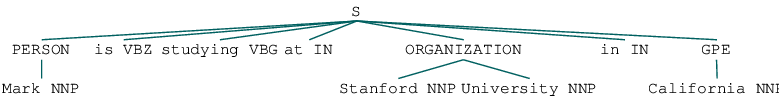

In [15]:
entities

In [16]:
print(entities)

(S
  (PERSON Mark/NNP)
  is/VBZ
  studying/VBG
  at/IN
  (ORGANIZATION Stanford/NNP University/NNP)
  in/IN
  (GPE California/NNP))


# 한글 NER

개체명 인식이 어려운 이유는 새로운 개체 명이 꾸준히 만들어지고 있기 때문에 사전에 모든 개체명을 등록할 수 없다는 점과 같은 단 어로 구성된 개체명이 문맥에 따라 다른 개체 명으로 해석될 수 있는 중의성이 발생할 수 있 다는 점이다. 

이러한 문제점을 고려하여 개체 명을 인식하기 위하여 예전에는 규칙에 기반 한 방법을 많이 사용하였으며(Ravin and Wacholder 1996; Brin, 1998; Liu et al. 2006) 현재는 학습 말뭉치를 이용한 기계학습 방법을 많이 사용한다(Bikel et al. 1997; Borthwick 1998; Asahara and Matsumoto 2003; McCallum and Li 2003).

규칙 기반의 방법의 경우 미리 만들어 둔 사전에 등록된 개체명들은 대부분 100% 신뢰 하고 개체명으로 인식하지만, 문맥상 개체명 이 아닌 단어에도 사전에 등록되어 있다는 이 유로 개체명으로 인식될 수 있는 문제점을 가 지고 있으며, 또한 앞서 기술한 중의성 등의 문제가 발생하기 쉽다. 

그에 비해 기계학습 방 법은 주변 문맥 등 말뭉치에 존재하는 패턴을 이용하여 개체명을 인식하기 때문에 중의성 등에 대해 조금 더 안전하지만, 말뭉치에 존재 하지 않는 개체명에 대해서는 그 정확도가 낮은 편이다. 

이러한 문제를 해결하기 위하여 말 뭉치와 독립적으로 개체명 사전을 구성하여 기계학습의 자질 중의 하나로 사용한다면, 인식률의 향상을 가져올 수 있다(Cohen 2004; Egorov et al. 2004). 또한 인식된 개체명을 분류할 때 개체명을 이루고 있는 단어 각각의 속성들을 이용한다면 좀 더 나은 인식률을 기 대할 수 있을 것이다.

규칙 기반의 방법의 경우 미리 만들어 둔 사전에 등록된 개체명들은 대부분 100% 신뢰 하고 개체명으로 인식하지만, 문맥상 개체명 이 아닌 단어에도 사전에 등록되어 있다는 이유로 개체명으로 인식될 수 있는 문제점을 가지고 있으며, 또한 앞서 기술한 중의성 등의 문제가 발생하기 쉽다.

기계학습 방법은 주변 문맥 등 말뭉치에 존재하는 패턴을 이용하여 개체명을 인식하기 때문에 중의성 등에 대해 조금 더 안전하지만, 말뭉치에 존재 하지 않는 개체명에 대해서는 그 정확도가 낮은 편이다. 
이러한 문제를 해결하기 위하여 말 뭉치와 독립적으로 개체명 사전을 구성하여 기계학습의 자질 중의 하나로 사용한다면, 인식률의 향상을 가져올 수 있다(Cohen 2004; Egorov et al. 2004)

* 규칙기반
* 학습기반
  * CRF
  * SVM
  * DNN

https://github.com/krikit/annie

https://github.com/hugman/deep_learning/tree/master/course/nlp/applications/named_entity_recognition

http://hugman.re.kr/blog/ner/